In [223]:
import os
import requests
import json
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as alpaca
import hvplot.pandas 
import datetime as dt 
import pandas_datareader as pdr
import numpy as np 
import matplotlib as plt
#from MCForecastTools import MCSimulation
import matplotlib.pyplot as plt
%matplotlib inline

In [224]:
test = [['JPM',50],['SBAC',12],['GOOGL',39],['TSLA',100],['GPN',22]]

In [225]:
df_test = pd.DataFrame(test, columns=['Ticker','Sentiment'])

In [226]:
df_test

,Ticker,Sentiment
0,JPM,50
1,SBAC,12
2,GOOGL,39
3,TSLA,100
4,GPN,22


In [227]:
# Insert test or twitter sentiment dataframe

df_portfolio = df_test[['Ticker','Sentiment']]
df_portfolio = df_portfolio.sort_values(by=['Sentiment'],ascending = False)

df_portfolio = df_portfolio.reset_index()

df_portfolio = df_portfolio.drop(['index'],axis=1)

df_portfolio

,Ticker,Sentiment
0,TSLA,100
1,JPM,50
2,GOOGL,39
3,GPN,22
4,SBAC,12


In [228]:
# Calculate total number of sentiments
sentiment_sum = df_portfolio['Sentiment'].sum()
print(sentiment_sum)

223


In [229]:
# Calculate the weights for each ticker
df_portfolio['weights'] = df_portfolio['Sentiment']/sentiment_sum

df_portfolio

,Ticker,Sentiment,weights
0,TSLA,100,0.448430
1,JPM,50,0.224215
2,GOOGL,39,0.174888
3,GPN,22,0.098655
4,SBAC,12,0.053812


/Users/edwardfoote/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1583: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  results = ax.pie(y, labels=blabels, **kwds)


<AxesSubplot:ylabel='weights'>

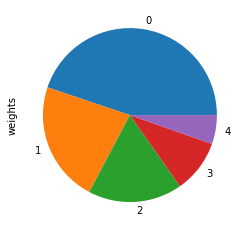

In [230]:
df_portfolio['weights'].plot.pie()

In [231]:
df_portfolio['weights'].sum()

1.0

In [232]:
ticker_0 = df_portfolio.loc[0,'Ticker']
ticker_1 = df_portfolio.loc[1,'Ticker']
ticker_2 = df_portfolio.loc[2,'Ticker']
ticker_3= df_portfolio.loc[3,'Ticker']
ticker_4= df_portfolio.loc[4,'Ticker']

print(ticker_2)

GOOGL


In [233]:
#Set start and end date for the API calls
start_date = pd.Timestamp('2010-08-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-11-23', tz='America/New_York').isoformat()

In [234]:
# INDEX 0: Make API call and populate dataframe with Close, and Daily Return info
df_0 = pdr.DataReader(ticker_0,'yahoo',start_date, end_date)
df_0 = df_0['Close']
df_0 = pd.DataFrame(df_0)
df_0['Daily Return'] = df_0['Close'].pct_change()
df_0 = df_0.dropna()
df_0

,Close,Daily Return
Date,,
2010-08-03,4.390000,0.049235
2010-08-04,4.252000,-0.031435
2010-08-05,4.090000,-0.038100
2010-08-06,3.918000,-0.042054
2010-08-09,3.920000,0.000510
...,...,...
2021-11-17,1089.010010,0.032501
2021-11-18,1096.380005,0.006768
2021-11-19,1137.060059,0.037104


In [235]:
#INDEX 0: Calculate annual return, annual standard deviation and Sharpe Ratio

# META NOTE: Because Facebook changed their name, the ticker META doesn't have 
#the same amount of historical data

df_0['Annual Return']=df_0['Daily Return'].rolling(window=252).mean()
df_0['Annual SD'] = df_0['Daily Return'].rolling(window=252).std()*np.sqrt(252)
df_0['Sharpe Ratio'] = (df_0['Annual Return']-.02)/df_0['Annual SD']
df_0 = df_0.dropna()
df_0


,Close,Daily Return,Annual Return,Annual SD,Sharpe Ratio
Date,,,,,
2011-08-01,5.754000,0.021299,0.001886,0.565612,-0.032026
2011-08-02,5.468000,-0.049705,0.001493,0.565949,-0.032700
2011-08-03,5.440000,-0.005121,0.001598,0.565023,-0.032569
2011-08-04,4.950000,-0.090074,0.001391,0.571048,-0.032587
2011-08-05,4.848000,-0.020606,0.001477,0.569811,-0.032508
...,...,...,...,...,...
2021-11-17,1089.010010,0.032501,0.004199,0.560123,-0.028210
2021-11-18,1096.380005,0.006768,0.003821,0.551463,-0.029338
2021-11-19,1137.060059,0.037104,0.003865,0.552024,-0.029228


In [236]:
# INDEX 1: Make API call and populate dataframe with Close, and Daily Return info
df_1 = pdr.DataReader(ticker_1,'yahoo',start_date, end_date)
df_1 = df_1['Close']
df_1 = pd.DataFrame(df_1)
df_1['Daily Return'] = df_1['Close'].pct_change()
df_1 = df_1.dropna()
df_1

,Close,Daily Return
Date,,
2010-08-03,41.080002,-0.013449
2010-08-04,41.290001,0.005112
2010-08-05,41.270000,-0.000484
2010-08-06,40.439999,-0.020112
2010-08-09,39.820000,-0.015331
...,...,...
2021-11-17,164.470001,-0.005382
2021-11-18,163.050003,-0.008634
2021-11-19,160.919998,-0.013064


In [237]:
#INDEX 1: Calculate annual return, annual standard deviation and Sharpe Ratio
df_1['Annual Return']=df_1['Daily Return'].rolling(window=252).mean()*252
df_1['Annual SD'] = df_1['Daily Return'].rolling(window=252).std()*np.sqrt(252)
df_1['Sharpe Ratio'] = (df_1['Annual Return']-.02)/df_1['Annual SD']
df_1 = df_1.dropna()
df_1

,Close,Daily Return,Annual Return,Annual SD,Sharpe Ratio
Date,,,,,
2011-08-01,40.439999,-0.000247,0.000429,0.244311,-0.080108
2011-08-02,39.840000,-0.014837,-0.000959,0.244392,-0.085762
2011-08-03,39.900002,0.001506,-0.004565,0.244342,-0.100536
2011-08-04,37.919998,-0.049624,-0.053705,0.249327,-0.295616
2011-08-05,37.599998,-0.008439,-0.042032,0.248664,-0.249463
...,...,...,...,...,...
2021-11-17,164.470001,-0.005382,0.372204,0.218882,1.609107
2021-11-18,163.050003,-0.008634,0.370977,0.218935,1.603110
2021-11-19,160.919998,-0.013064,0.355224,0.219413,1.527818


In [238]:
# INDEX 2: Make API call and populate dataframe with Close, and Daily Return info
df_2 = pdr.DataReader(ticker_2,'yahoo',start_date, end_date)
df_2 = df_2['Close']
df_2 = pd.DataFrame(df_2)
df_2['Daily Return'] = df_2['Close'].pct_change()
df_2 = df_2.dropna()
df_2

,Close,Daily Return
Date,,
2010-08-03,245.160156,-0.001183
2010-08-04,253.413406,0.033665
2010-08-05,254.304306,0.003516
2010-08-06,250.360367,-0.015509
2010-08-09,252.927933,0.010255
...,...,...
2021-11-17,2960.939941,0.001156
2021-11-18,2996.770020,0.012101
2021-11-19,2978.530029,-0.006087


In [239]:
#INDEX 2: Calculate annual return, annual standard deviation and Sharpe Ratio
df_2['Annual Return']=df_2['Daily Return'].rolling(window=252).mean()*252
df_2['Annual SD'] = df_2['Daily Return'].rolling(window=252).std()*np.sqrt(252)
df_2['Sharpe Ratio'] = (df_2['Annual Return']-.02)/df_2['Annual SD']
df_2 = df_2.dropna()
df_2

,Close,Daily Return,Annual Return,Annual SD,Sharpe Ratio
Date,,,,,
2011-08-01,303.688690,0.005102,0.249553,0.274042,0.837658
2011-08-02,296.496490,-0.023683,0.227053,0.275142,0.752531
2011-08-03,300.885895,0.014804,0.208193,0.273529,0.688017
2011-08-04,289.049042,-0.039340,0.165337,0.276448,0.525730
2011-08-05,289.809814,0.002632,0.183478,0.275977,0.592359
...,...,...,...,...,...
2021-11-17,2960.939941,0.001156,0.548161,0.239415,2.206044
2021-11-18,2996.770020,0.012101,0.572193,0.239200,2.308505
2021-11-19,2978.530029,-0.006087,0.555806,0.239209,2.239912


In [240]:
# INDEX 3: Make API call and populate dataframe with Close, and Daily Return info
df_3 = pdr.DataReader(ticker_3,'yahoo',start_date, end_date)
df_3 = df_3['Close']
df_3 = pd.DataFrame(df_3)
df_3['Daily Return'] = df_3['Close'].pct_change()
df_3 = df_3.dropna()
df_3

,Close,Daily Return
Date,,
2010-08-03,19.145000,-0.006229
2010-08-04,19.115000,-0.001567
2010-08-05,19.075001,-0.002093
2010-08-06,19.295000,0.011533
2010-08-09,19.570000,0.014252
...,...,...
2021-11-17,125.510002,-0.029762
2021-11-18,126.849998,0.010676
2021-11-19,125.930000,-0.007253


In [241]:
#INDEX 3: Calculate annual return, annual standard deviation and Sharpe Ratio
df_3['Annual Return']=df_3['Daily Return'].rolling(window=252).mean()*252
df_3['Annual SD'] = df_3['Daily Return'].rolling(window=252).std()*np.sqrt(252)
df_3['Sharpe Ratio'] = (df_3['Annual Return']-.02)/df_3['Annual SD']
df_3 = df_3.dropna()
df_3

,Close,Daily Return,Annual Return,Annual SD,Sharpe Ratio
Date,,,,,
2011-08-01,23.684999,-0.000844,0.231267,0.221008,0.955923
2011-08-02,22.980000,-0.029766,0.207730,0.223017,0.841776
2011-08-03,23.655001,0.029373,0.238671,0.224823,0.972636
2011-08-04,22.510000,-0.048404,0.192359,0.230158,0.748873
2011-08-05,22.325001,-0.008219,0.172607,0.230077,0.663286
...,...,...,...,...,...
2021-11-17,125.510002,-0.029762,-0.366519,0.304059,-1.271200
2021-11-18,126.849998,0.010676,-0.345781,0.304176,-1.202530
2021-11-19,125.930000,-0.007253,-0.367029,0.303841,-1.273791


In [242]:
# INDEX 4: Make API call and populate dataframe with Close, and Daily Return info
df_4 = pdr.DataReader(ticker_4,'yahoo',start_date, end_date)
df_4 = df_4['Close']
df_4 = pd.DataFrame(df_4)
df_4['Daily Return'] = df_4['Close'].pct_change()
df_4 = df_4.dropna()
df_4

,Close,Daily Return
Date,,
2010-08-03,36.029999,-0.030148
2010-08-04,36.680000,0.018041
2010-08-05,36.599998,-0.002181
2010-08-06,35.990002,-0.016667
2010-08-09,36.299999,0.008613
...,...,...
2021-11-17,350.290009,0.008377
2021-11-18,345.239990,-0.014417
2021-11-19,344.989990,-0.000724


In [243]:
#INDEX 4: Calculate annual return, annual standard deviation and Sharpe Ratio
df_4['Annual Return']=df_4['Daily Return'].rolling(window=252).mean()*252
df_4['Annual SD'] = df_4['Daily Return'].rolling(window=252).std()*np.sqrt(252)
df_4['Sharpe Ratio'] = (df_4['Annual Return']-.02)/df_4['Annual SD']
df_4 = df_4.dropna()
df_4

,Close,Daily Return,Annual Return,Annual SD,Sharpe Ratio
Date,,,,,
2011-08-01,38.400002,0.006026,0.052188,0.194498,0.165493
2011-08-02,37.389999,-0.026302,0.056034,0.193932,0.185808
2011-08-03,38.970001,0.042257,0.080251,0.197643,0.304847
2011-08-04,36.299999,-0.068514,0.013918,0.209274,-0.029064
2011-08-05,35.580002,-0.019835,0.010750,0.209552,-0.044144
...,...,...,...,...,...
2021-11-17,350.290009,0.008377,0.180537,0.207371,0.774153
2021-11-18,345.239990,-0.014417,0.166991,0.207917,0.706968
2021-11-19,344.989990,-0.000724,0.168812,0.207897,0.715799


In [244]:
# Add annual return for each ticker to portfolio dataframe

df_portfolio.loc[0,'Annual Return'] = df_0.loc['2021-11-23','Annual Return']
df_portfolio.loc[1,'Annual Return'] = df_1.loc['2021-11-23','Annual Return']
df_portfolio.loc[2,'Annual Return'] = df_2.loc['2021-11-23','Annual Return']
df_portfolio.loc[3,'Annual Return'] = df_3.loc['2021-11-23','Annual Return']
df_portfolio.loc[4,'Annual Return'] = df_4.loc['2021-11-23','Annual Return']
df_portfolio

,Ticker,Sentiment,weights,Annual Return
0,TSLA,100,0.448430,0.003586
1,JPM,50,0.224215,0.380215
2,GOOGL,39,0.174888,0.552327
3,GPN,22,0.098655,-0.382174
4,SBAC,12,0.053812,0.219269


In [245]:
# Add annual standard deviation for each ticker to portfolio dataframe

df_portfolio.loc[0,'Annual SD'] = df_0.loc['2021-11-23','Annual SD']
df_portfolio.loc[1,'Annual SD'] = df_1.loc['2021-11-23','Annual SD']
df_portfolio.loc[2,'Annual SD'] = df_2.loc['2021-11-23','Annual SD']
df_portfolio.loc[3,'Annual SD'] = df_3.loc['2021-11-23','Annual SD']
df_portfolio.loc[4,'Annual SD'] = df_4.loc['2021-11-23','Annual SD']
df_portfolio

,Ticker,Sentiment,weights,Annual Return,Annual SD
0,TSLA,100,0.448430,0.003586,0.550046
1,JPM,50,0.224215,0.380215,0.219528
2,GOOGL,39,0.174888,0.552327,0.239530
3,GPN,22,0.098655,-0.382174,0.304519
4,SBAC,12,0.053812,0.219269,0.206249


In [246]:
# Add the Sharpe Ratio for each ticker to portfolio dataframe

df_portfolio.loc[0,'Sharpe Ratio'] = df_0.loc['2021-11-23','Sharpe Ratio']
df_portfolio.loc[1,'Sharpe Ratio'] = df_1.loc['2021-11-23','Sharpe Ratio']
df_portfolio.loc[2,'Sharpe Ratio'] = df_2.loc['2021-11-23','Sharpe Ratio']
df_portfolio.loc[3,'Sharpe Ratio'] = df_3.loc['2021-11-23','Sharpe Ratio']
df_portfolio.loc[4,'Sharpe Ratio'] = df_4.loc['2021-11-23','Sharpe Ratio']
df_portfolio

,Ticker,Sentiment,weights,Annual Return,Annual SD,Sharpe Ratio
0,TSLA,100,0.448430,0.003586,0.550046,-0.029841
1,JPM,50,0.224215,0.380215,0.219528,1.640859
2,GOOGL,39,0.174888,0.552327,0.239530,2.222376
3,GPN,22,0.098655,-0.382174,0.304519,-1.320684
4,SBAC,12,0.053812,0.219269,0.206249,0.966159


In [247]:
# Create a dataframe to store the weighted values of each firm  
metric_weights = pd.DataFrame(df_portfolio['Ticker'])
metric_weights['weights'] = df_portfolio['weights']
metric_weights['Weighted Annual Return'] = df_portfolio['weights']*df_portfolio['Annual Return']
metric_weights['Weighted Annual SD'] = df_portfolio['weights']*df_portfolio['Annual SD']
metric_weights['Weighted Sharpe Ratio'] = df_portfolio['weights']*df_portfolio['Sharpe Ratio']


metric_weights

,Ticker,weights,Weighted Annual Return,Weighted Annual SD,Weighted Sharpe Ratio
0,TSLA,0.448430,0.001608,0.246657,-0.013382
1,JPM,0.224215,0.085250,0.049222,0.367906
2,GOOGL,0.174888,0.096595,0.041891,0.388667
3,GPN,0.098655,-0.037703,0.030042,-0.130292
4,SBAC,0.053812,0.011799,0.011099,0.051991


In [248]:
# Create a dataframe of portfolio metrics 
portfolio_metrics = pd.DataFrame(columns=['', 'Metric'])

portfolio_metrics.loc[0] = 'Portfolio Annual Return'
portfolio_metrics.loc[0,'Metric'] = metric_weights['Weighted Annual Return'].sum()

portfolio_metrics.loc[1] = 'Portfolio Annual SD'
portfolio_metrics.loc[1,'Metric'] = metric_weights['Weighted Annual SD'].sum()

portfolio_metrics.loc[2] = 'Portfolio Sharpe Ratio'
portfolio_metrics.loc[2,'Metric'] = ((portfolio_metrics.loc[0,'Metric']-.02)
                                     /portfolio_metrics.loc[1,'Metric'])

portfolio_metrics = portfolio_metrics.set_index('')
portfolio_metrics

,Metric
,
Portfolio Annual Return,0.157549
Portfolio Annual SD,0.378911
Portfolio Sharpe Ratio,0.363012


In [249]:
portfolio_metrics['SP 500 Benchmark'] = np.nan


In [250]:
# Make a dataframe for the SP 500 to use as a benchmark for the Twitter portfolio
sp_500 = pdr.DataReader('^GSPC','yahoo',start_date, end_date)
sp_500 = sp_500['Close']
sp_500 = pd.DataFrame(sp_500)
sp_500['Daily Return'] = sp_500['Close'].pct_change()
sp_500 = sp_500.dropna()

sp_500

,Close,Daily Return
Date,,
2010-08-03,1120.459961,-0.004796
2010-08-04,1127.239990,0.006051
2010-08-05,1125.810059,-0.001269
2010-08-06,1121.640015,-0.003704
2010-08-09,1127.790039,0.005483
...,...,...
2021-11-17,4688.669922,-0.002602
2021-11-18,4704.540039,0.003385
2021-11-19,4697.959961,-0.001399


In [251]:
# Calculate metrics for the SP 500
sp_500['Annual Return']=sp_500['Daily Return'].rolling(window=252).mean()*252
sp_500['Annual SD'] = sp_500['Daily Return'].rolling(window=252).std()*np.sqrt(252)
sp_500['Sharpe Ratio'] = (sp_500['Annual Return']-.02)/sp_500['Annual SD']
sp_500 = sp_500.dropna()
sp_500



,Close,Daily Return,Annual Return,Annual SD,Sharpe Ratio
Date,,,,,
2011-08-01,1286.939941,-0.004132,0.142818,0.134861,0.910701
2011-08-02,1254.050049,-0.025557,0.122057,0.137266,0.743501
2011-08-03,1260.339966,0.005016,0.121022,0.137228,0.736163
2011-08-04,1200.069946,-0.047820,0.074470,0.145471,0.374437
2011-08-05,1199.380005,-0.000575,0.077599,0.145419,0.396091
...,...,...,...,...,...
2021-11-17,4688.669922,-0.002602,0.269036,0.121251,2.053890
2021-11-18,4704.540039,0.003385,0.283984,0.120607,2.188797
2021-11-19,4697.959961,-0.001399,0.278639,0.120600,2.144603


In [252]:
# Put the SP 500 metrics into the portfolio metrics dataframe

portfolio_metrics.loc['Portfolio Annual Return','SP 500 Benchmark'] = sp_500.loc['2021-11-23','Annual Return']
portfolio_metrics.loc['Portfolio Annual SD','SP 500 Benchmark'] = sp_500.loc['2021-11-23','Annual SD']
portfolio_metrics.loc['Portfolio Sharpe Ratio','SP 500 Benchmark'] = sp_500.loc['2021-11-23','Sharpe Ratio']

In [253]:
portfolio_metrics



,Metric,SP 500 Benchmark
,,
Portfolio Annual Return,0.157549,0.278256
Portfolio Annual SD,0.378911,0.120333
Portfolio Sharpe Ratio,0.363012,2.146177


In [254]:
df_portfolio 

,Ticker,Sentiment,weights,Annual Return,Annual SD,Sharpe Ratio
0,TSLA,100,0.448430,0.003586,0.550046,-0.029841
1,JPM,50,0.224215,0.380215,0.219528,1.640859
2,GOOGL,39,0.174888,0.552327,0.239530,2.222376
3,GPN,22,0.098655,-0.382174,0.304519,-1.320684
4,SBAC,12,0.053812,0.219269,0.206249,0.966159


## ESG Data


In [255]:
# Import the csv file of ESG data

esg = pd.read_csv('ESG_data.csv', parse_dates= True)

esg

,Date,Total-Score,E-Score,S-Score,G-Score,Ticker
0,2014-09-01,61.00,74.00,45.00,62.00,AAPL
1,2014-10-01,60.00,74.00,45.00,62.00,AAPL
2,2014-11-01,61.00,74.00,45.00,62.00,AAPL
3,2014-12-01,61.00,74.00,45.00,62.00,AAPL
4,2015-01-01,61.00,74.00,45.00,62.00,AAPL
...,...,...,...,...,...,...
25273,2021-05-01,26.72,10.85,8.57,7.29,HAL
25274,2021-06-01,NaN,NaN,NaN,NaN,HAL
25275,2021-07-01,NaN,NaN,NaN,NaN,HAL
25276,2021-08-01,NaN,NaN,NaN,NaN,HAL


In [256]:
# INDEX 0: Create ESG dataframe for each ticker in portfolio by selecting rows that contain the specific Ticker 


ticker_0_esg = esg[esg['Ticker'].str.contains(ticker_0)]

ticker_0_esg['Date'] = pd.to_datetime(ticker_0_esg['Date'])

ticker_0_esg = ticker_0_esg.set_index('Date')

ticker_0_esg = ticker_0_esg.dropna()

ticker_0_esg


<ipython-input-256-a6712fcebbdb>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ticker_0_esg['Date'] = pd.to_datetime(ticker_0_esg['Date'])


,Total-Score,E-Score,S-Score,G-Score,Ticker
Date,,,,,
2014-09-01,56.00,62.00,50.00,52.00,TSLA
2014-10-01,56.00,62.00,50.00,52.00,TSLA
2014-11-01,56.00,62.00,50.00,52.00,TSLA
2014-12-01,56.00,62.00,50.00,52.00,TSLA
2015-01-01,56.00,62.00,50.00,55.00,TSLA
...,...,...,...,...,...
2021-01-01,31.09,2.75,17.31,11.03,TSLA
2021-02-01,31.09,2.75,17.31,11.03,TSLA
2021-03-01,31.29,2.95,17.31,11.03,TSLA


In [257]:
# INDEX 1: Create ESG dataframe for each ticker in portfolio by selecting rows that contain the specific Ticker 


ticker_1_esg = esg[esg['Ticker'].str.contains(ticker_1)]

ticker_1_esg['Date'] = pd.to_datetime(ticker_1_esg['Date'])

ticker_1_esg = ticker_1_esg.set_index('Date')

ticker_1_esg = ticker_1_esg.dropna()

ticker_1_esg



<ipython-input-257-882db2b23ee8>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ticker_1_esg['Date'] = pd.to_datetime(ticker_1_esg['Date'])


,Total-Score,E-Score,S-Score,G-Score,Ticker
Date,,,,,
2014-09-01,67.00,62.00,73.00,64.00,JPM
2014-10-01,67.00,62.00,73.00,64.00,JPM
2014-11-01,67.00,62.00,73.00,64.00,JPM
2014-12-01,71.00,76.00,73.00,65.00,JPM
2015-01-01,71.00,76.00,73.00,65.00,JPM
...,...,...,...,...,...
2021-01-01,27.90,1.04,16.07,10.79,JPM
2021-02-01,27.90,1.04,16.07,10.79,JPM
2021-03-01,27.90,1.04,16.07,10.79,JPM


In [258]:
# INDEX 2: Create ESG dataframe for each ticker in portfolio by selecting rows that contain the specific Ticker 


ticker_2_esg = esg[esg['Ticker'].str.contains(ticker_2)]

ticker_2_esg['Date'] = pd.to_datetime(ticker_2_esg['Date'])

ticker_2_esg = ticker_2_esg.set_index('Date')

ticker_2_esg = ticker_2_esg.dropna()

ticker_2_esg



<ipython-input-258-5f6a5fac5f32>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ticker_2_esg['Date'] = pd.to_datetime(ticker_2_esg['Date'])


,Total-Score,E-Score,S-Score,G-Score,Ticker
Date,,,,,
2014-09-01,59.00,74.00,52.00,53.00,GOOGL
2014-10-01,59.00,74.00,52.00,53.00,GOOGL
2014-11-01,59.00,74.00,52.00,53.00,GOOGL
2014-12-01,63.00,73.00,60.00,55.00,GOOGL
2015-01-01,63.00,73.00,60.00,55.00,GOOGL
...,...,...,...,...,...
2021-01-01,22.85,0.48,9.87,12.49,GOOGL
2021-02-01,22.85,0.48,9.87,12.49,GOOGL
2021-03-01,22.29,0.48,9.87,11.94,GOOGL


In [259]:
# INDEX 3: Create ESG dataframe for each ticker in portfolio by selecting rows that contain the specific Ticker 


ticker_3_esg = esg[esg['Ticker'].str.contains(ticker_3)]

ticker_3_esg['Date'] = pd.to_datetime(ticker_3_esg['Date'])

ticker_3_esg = ticker_3_esg.set_index('Date')

ticker_3_esg = ticker_3_esg.dropna()

ticker_3_esg



<ipython-input-259-a16401a5fa06>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ticker_3_esg['Date'] = pd.to_datetime(ticker_3_esg['Date'])


,Total-Score,E-Score,S-Score,G-Score,Ticker
Date,,,,,
2014-09-01,49.00,37.00,47.00,68.00,GPN
2014-10-01,49.00,37.00,47.00,68.00,GPN
2014-11-01,49.00,37.00,47.00,68.00,GPN
2014-12-01,49.00,37.00,47.00,68.00,GPN
2015-01-01,49.00,37.00,47.00,68.00,GPN
...,...,...,...,...,...
2021-01-01,18.45,0.16,10.95,7.34,GPN
2021-02-01,18.45,0.16,10.95,7.34,GPN
2021-03-01,18.51,0.16,10.95,7.40,GPN


In [260]:
# INDEX 4: Create ESG dataframe for each ticker in portfolio by selecting rows that contain the specific Ticker 


ticker_4_esg = esg[esg['Ticker'].str.contains(ticker_4)]

ticker_4_esg['Date'] = pd.to_datetime(ticker_4_esg['Date'])

ticker_4_esg = ticker_4_esg.set_index('Date')

ticker_4_esg = ticker_4_esg.dropna()

ticker_4_esg



<ipython-input-260-29f4110897d2>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ticker_4_esg['Date'] = pd.to_datetime(ticker_4_esg['Date'])


,Total-Score,E-Score,S-Score,G-Score,Ticker
Date,,,,,
2014-09-01,43.00,40.00,37.00,57.00,SBAC
2014-10-01,44.00,40.00,39.00,59.00,SBAC
2014-11-01,44.00,40.00,39.00,59.00,SBAC
2014-12-01,44.00,40.00,39.00,59.00,SBAC
2015-01-01,44.00,40.00,39.00,59.00,SBAC
...,...,...,...,...,...
2021-01-01,17.44,2.36,7.76,7.33,SBAC
2021-02-01,17.21,2.36,7.76,7.09,SBAC
2021-03-01,17.21,2.36,7.76,7.09,SBAC


In [261]:
df_portfolio

,Ticker,Sentiment,weights,Annual Return,Annual SD,Sharpe Ratio
0,TSLA,100,0.448430,0.003586,0.550046,-0.029841
1,JPM,50,0.224215,0.380215,0.219528,1.640859
2,GOOGL,39,0.174888,0.552327,0.239530,2.222376
3,GPN,22,0.098655,-0.382174,0.304519,-1.320684
4,SBAC,12,0.053812,0.219269,0.206249,0.966159


In [262]:
# Calculate the mean scores for the last available 12 months of ESG data to smooth out potential outliers

yearly_esg_0 = ticker_0_esg.resample('Y').mean()

yearly_esg_1 = ticker_1_esg.resample('Y').mean()

yearly_esg_2 = ticker_2_esg.resample('Y').mean()

yearly_esg_3 = ticker_3_esg.resample('Y').mean()

yearly_esg_4 = ticker_4_esg.resample('Y').mean()

yearly_esg_4

,Total-Score,E-Score,S-Score,G-Score
Date,,,,
2014-12-31,43.750000,40.0000,38.500000,58.500000
2015-12-31,44.083333,40.0000,39.000000,59.416667
2016-12-31,44.461667,40.2775,36.475833,63.850000
2017-12-31,44.447500,40.5900,39.340000,58.275000
2018-12-31,41.805833,40.0125,38.815000,48.112500
2019-12-31,42.478333,40.2875,41.449167,46.429167
2020-12-31,17.318333,2.3600,7.760000,7.205000
2021-12-31,16.268000,2.7800,7.048000,6.442000


In [263]:
yearly_esg_4.iloc[-1:]

,Total-Score,E-Score,S-Score,G-Score
Date,,,,
2021-12-31,16.268,2.78,7.048,6.442


In [264]:
df_portfolio['Total ESG'] = np.nan

df_portfolio

,Ticker,Sentiment,weights,Annual Return,Annual SD,Sharpe Ratio,Total ESG
0,TSLA,100,0.448430,0.003586,0.550046,-0.029841,NaN
1,JPM,50,0.224215,0.380215,0.219528,1.640859,NaN
2,GOOGL,39,0.174888,0.552327,0.239530,2.222376,NaN
3,GPN,22,0.098655,-0.382174,0.304519,-1.320684,NaN
4,SBAC,12,0.053812,0.219269,0.206249,0.966159,NaN


In [265]:
# Add the ESG scores to the portfolio dataframe

df_portfolio.loc[0,'Total ESG'] = yearly_esg_0.loc['2021-12-31','Total-Score']

df_portfolio.loc[1,'Total ESG'] = yearly_esg_1.loc['2021-12-31','Total-Score']

df_portfolio.loc[2,'Total ESG'] = yearly_esg_2.loc['2021-12-31','Total-Score']

df_portfolio.loc[3,'Total ESG'] = yearly_esg_3.loc['2021-12-31','Total-Score']

df_portfolio.loc[4,'Total ESG'] = yearly_esg_4.loc['2021-12-31','Total-Score']



df_portfolio

,Ticker,Sentiment,weights,Annual Return,Annual SD,Sharpe Ratio,Total ESG
0,TSLA,100,0.448430,0.003586,0.550046,-0.029841,31.044
1,JPM,50,0.224215,0.380215,0.219528,1.640859,27.936
2,GOOGL,39,0.174888,0.552327,0.239530,2.222376,22.634
3,GPN,22,0.098655,-0.382174,0.304519,-1.320684,18.642
4,SBAC,12,0.053812,0.219269,0.206249,0.966159,16.268


In [266]:
# Apply the ESG scores to the metric weights dataframe

metric_weights['Weighted Total ESG']= df_portfolio['weights']*df_portfolio['Total ESG']

metric_weights

,Ticker,weights,Weighted Annual Return,Weighted Annual SD,Weighted Sharpe Ratio,Weighted Total ESG
0,TSLA,0.448430,0.001608,0.246657,-0.013382,13.921076
1,JPM,0.224215,0.085250,0.049222,0.367906,6.263677
2,GOOGL,0.174888,0.096595,0.041891,0.388667,3.958413
3,GPN,0.098655,-0.037703,0.030042,-0.130292,1.839121
4,SBAC,0.053812,0.011799,0.011099,0.051991,0.875408


In [271]:
# Add the ESG metric to the portfolio metrics dataframe

esg_row_df = pd.DataFrame([esg_row], index = ['Total ESG Score'], columns=['Metric','SP 500 Benchmark'])

esg_row_df.loc['Total ESG Score','Metric'] = metric_weights['Weighted Total ESG'].sum()

portfolio_metrics = pd.concat([portfolio_metrics, esg_row_df])

portfolio_metrics

,Metric,SP 500 Benchmark
Portfolio Annual Return,0.157549,0.278256
Portfolio Annual SD,0.378911,0.120333
Portfolio Sharpe Ratio,0.363012,2.146177
Total ESG Score,26.857695,NaN
